# Implementing K-Nearest Neighbors algorithm from Scratch

In [67]:
from math import ceil
import numpy as np
import csv
import random

Storing data into list from iris.csv file

In [2]:
with open('iris.csv', newline='') as f:
    reader = csv.reader(f)
    data = list(reader)

In [3]:
data

[['5.1', '3.5', '1.4', '0.2', 'Iris-setosa'],
 ['4.9', '3.0', '1.4', '0.2', 'Iris-setosa'],
 ['4.7', '3.2', '1.3', '0.2', 'Iris-setosa'],
 ['4.6', '3.1', '1.5', '0.2', 'Iris-setosa'],
 ['5.0', '3.6', '1.4', '0.2', 'Iris-setosa'],
 ['5.4', '3.9', '1.7', '0.4', 'Iris-setosa'],
 ['4.6', '3.4', '1.4', '0.3', 'Iris-setosa'],
 ['5.0', '3.4', '1.5', '0.2', 'Iris-setosa'],
 ['4.4', '2.9', '1.4', '0.2', 'Iris-setosa'],
 ['4.9', '3.1', '1.5', '0.1', 'Iris-setosa'],
 ['5.4', '3.7', '1.5', '0.2', 'Iris-setosa'],
 ['4.8', '3.4', '1.6', '0.2', 'Iris-setosa'],
 ['4.8', '3.0', '1.4', '0.1', 'Iris-setosa'],
 ['4.3', '3.0', '1.1', '0.1', 'Iris-setosa'],
 ['5.8', '4.0', '1.2', '0.2', 'Iris-setosa'],
 ['5.7', '4.4', '1.5', '0.4', 'Iris-setosa'],
 ['5.4', '3.9', '1.3', '0.4', 'Iris-setosa'],
 ['5.1', '3.5', '1.4', '0.3', 'Iris-setosa'],
 ['5.7', '3.8', '1.7', '0.3', 'Iris-setosa'],
 ['5.1', '3.8', '1.5', '0.3', 'Iris-setosa'],
 ['5.4', '3.4', '1.7', '0.2', 'Iris-setosa'],
 ['5.1', '3.7', '1.5', '0.4', 'Iri

deleting the extra row at the end

In [4]:
data.pop(-1)

[]

In [5]:
len(data)

150

we can see that there are 150 rows in our dataset

the attribute values are string type, so converting them into float 

In [6]:
for i in range(len(data)):
    for j in range(len(data[i])-1):
        data[i][j] = float(data[i][j])

In [7]:
data

[[5.1, 3.5, 1.4, 0.2, 'Iris-setosa'],
 [4.9, 3.0, 1.4, 0.2, 'Iris-setosa'],
 [4.7, 3.2, 1.3, 0.2, 'Iris-setosa'],
 [4.6, 3.1, 1.5, 0.2, 'Iris-setosa'],
 [5.0, 3.6, 1.4, 0.2, 'Iris-setosa'],
 [5.4, 3.9, 1.7, 0.4, 'Iris-setosa'],
 [4.6, 3.4, 1.4, 0.3, 'Iris-setosa'],
 [5.0, 3.4, 1.5, 0.2, 'Iris-setosa'],
 [4.4, 2.9, 1.4, 0.2, 'Iris-setosa'],
 [4.9, 3.1, 1.5, 0.1, 'Iris-setosa'],
 [5.4, 3.7, 1.5, 0.2, 'Iris-setosa'],
 [4.8, 3.4, 1.6, 0.2, 'Iris-setosa'],
 [4.8, 3.0, 1.4, 0.1, 'Iris-setosa'],
 [4.3, 3.0, 1.1, 0.1, 'Iris-setosa'],
 [5.8, 4.0, 1.2, 0.2, 'Iris-setosa'],
 [5.7, 4.4, 1.5, 0.4, 'Iris-setosa'],
 [5.4, 3.9, 1.3, 0.4, 'Iris-setosa'],
 [5.1, 3.5, 1.4, 0.3, 'Iris-setosa'],
 [5.7, 3.8, 1.7, 0.3, 'Iris-setosa'],
 [5.1, 3.8, 1.5, 0.3, 'Iris-setosa'],
 [5.4, 3.4, 1.7, 0.2, 'Iris-setosa'],
 [5.1, 3.7, 1.5, 0.4, 'Iris-setosa'],
 [4.6, 3.6, 1.0, 0.2, 'Iris-setosa'],
 [5.1, 3.3, 1.7, 0.5, 'Iris-setosa'],
 [4.8, 3.4, 1.9, 0.2, 'Iris-setosa'],
 [5.0, 3.0, 1.6, 0.2, 'Iris-setosa'],
 [5.0, 3.4, 

now we have converted all attributes to float except the class label

We convert class labels into integer values

Iris setosa --> 1

Iris versicolor --> 2

Iris virginica --> 3

In [8]:
for i in range(len(data)):
    if(data[i][-1] == "Iris-setosa"):
        data[i][-1] = 1
    elif(data[i][-1] == "Iris-versicolor"):
        data[i][-1] = 2
    elif(data[i][-1] == "Iris-virginica"):
        data[i][-1] = 3

In [9]:
data

[[5.1, 3.5, 1.4, 0.2, 1],
 [4.9, 3.0, 1.4, 0.2, 1],
 [4.7, 3.2, 1.3, 0.2, 1],
 [4.6, 3.1, 1.5, 0.2, 1],
 [5.0, 3.6, 1.4, 0.2, 1],
 [5.4, 3.9, 1.7, 0.4, 1],
 [4.6, 3.4, 1.4, 0.3, 1],
 [5.0, 3.4, 1.5, 0.2, 1],
 [4.4, 2.9, 1.4, 0.2, 1],
 [4.9, 3.1, 1.5, 0.1, 1],
 [5.4, 3.7, 1.5, 0.2, 1],
 [4.8, 3.4, 1.6, 0.2, 1],
 [4.8, 3.0, 1.4, 0.1, 1],
 [4.3, 3.0, 1.1, 0.1, 1],
 [5.8, 4.0, 1.2, 0.2, 1],
 [5.7, 4.4, 1.5, 0.4, 1],
 [5.4, 3.9, 1.3, 0.4, 1],
 [5.1, 3.5, 1.4, 0.3, 1],
 [5.7, 3.8, 1.7, 0.3, 1],
 [5.1, 3.8, 1.5, 0.3, 1],
 [5.4, 3.4, 1.7, 0.2, 1],
 [5.1, 3.7, 1.5, 0.4, 1],
 [4.6, 3.6, 1.0, 0.2, 1],
 [5.1, 3.3, 1.7, 0.5, 1],
 [4.8, 3.4, 1.9, 0.2, 1],
 [5.0, 3.0, 1.6, 0.2, 1],
 [5.0, 3.4, 1.6, 0.4, 1],
 [5.2, 3.5, 1.5, 0.2, 1],
 [5.2, 3.4, 1.4, 0.2, 1],
 [4.7, 3.2, 1.6, 0.2, 1],
 [4.8, 3.1, 1.6, 0.2, 1],
 [5.4, 3.4, 1.5, 0.4, 1],
 [5.2, 4.1, 1.5, 0.1, 1],
 [5.5, 4.2, 1.4, 0.2, 1],
 [4.9, 3.1, 1.5, 0.1, 1],
 [5.0, 3.2, 1.2, 0.2, 1],
 [5.5, 3.5, 1.3, 0.2, 1],
 [4.9, 3.1, 1.5, 0.1, 1],
 [4.4, 3.0, 

Now our data is ready, we can perform operations on it

## A. Divide the dataset as development and test. Because kNN does not require training you don’t have a train dataset. Make sure randomly divide the dataset

We will shuffle our data randomly and then split it into development data set and test dataset

In [10]:
random.shuffle(data)

In [11]:
data

[[5.5, 2.5, 4.0, 1.3, 2],
 [5.7, 3.0, 4.2, 1.2, 2],
 [5.9, 3.0, 4.2, 1.5, 2],
 [5.4, 3.4, 1.5, 0.4, 1],
 [6.3, 3.3, 6.0, 2.5, 3],
 [5.7, 2.8, 4.5, 1.3, 2],
 [7.3, 2.9, 6.3, 1.8, 3],
 [4.8, 3.4, 1.6, 0.2, 1],
 [6.4, 3.2, 4.5, 1.5, 2],
 [6.4, 2.8, 5.6, 2.1, 3],
 [5.1, 3.8, 1.9, 0.4, 1],
 [4.9, 3.1, 1.5, 0.1, 1],
 [6.9, 3.1, 5.4, 2.1, 3],
 [5.1, 3.5, 1.4, 0.3, 1],
 [5.5, 2.4, 3.8, 1.1, 2],
 [5.4, 3.9, 1.7, 0.4, 1],
 [7.6, 3.0, 6.6, 2.1, 3],
 [5.8, 2.7, 5.1, 1.9, 3],
 [4.9, 3.1, 1.5, 0.1, 1],
 [5.2, 2.7, 3.9, 1.4, 2],
 [6.5, 2.8, 4.6, 1.5, 2],
 [5.1, 3.8, 1.5, 0.3, 1],
 [7.4, 2.8, 6.1, 1.9, 3],
 [5.7, 2.5, 5.0, 2.0, 3],
 [6.0, 2.2, 4.0, 1.0, 2],
 [7.2, 3.6, 6.1, 2.5, 3],
 [4.9, 3.0, 1.4, 0.2, 1],
 [5.1, 3.7, 1.5, 0.4, 1],
 [5.7, 4.4, 1.5, 0.4, 1],
 [5.0, 3.3, 1.4, 0.2, 1],
 [6.5, 3.0, 5.2, 2.0, 3],
 [5.1, 3.3, 1.7, 0.5, 1],
 [5.1, 3.8, 1.6, 0.2, 1],
 [6.7, 3.1, 4.4, 1.4, 2],
 [5.7, 2.9, 4.2, 1.3, 2],
 [5.1, 3.4, 1.5, 0.2, 1],
 [6.3, 3.3, 4.7, 1.6, 2],
 [7.7, 3.0, 6.1, 2.3, 3],
 [5.3, 3.7, 

Now data is shuffled, we split data into development and test in (70:30) ratio. which means out of 150 rows, 105 to development and 45 test.

In [12]:
dev = data[:105]
test = data[105:]

In [13]:
dev

[[5.5, 2.5, 4.0, 1.3, 2],
 [5.7, 3.0, 4.2, 1.2, 2],
 [5.9, 3.0, 4.2, 1.5, 2],
 [5.4, 3.4, 1.5, 0.4, 1],
 [6.3, 3.3, 6.0, 2.5, 3],
 [5.7, 2.8, 4.5, 1.3, 2],
 [7.3, 2.9, 6.3, 1.8, 3],
 [4.8, 3.4, 1.6, 0.2, 1],
 [6.4, 3.2, 4.5, 1.5, 2],
 [6.4, 2.8, 5.6, 2.1, 3],
 [5.1, 3.8, 1.9, 0.4, 1],
 [4.9, 3.1, 1.5, 0.1, 1],
 [6.9, 3.1, 5.4, 2.1, 3],
 [5.1, 3.5, 1.4, 0.3, 1],
 [5.5, 2.4, 3.8, 1.1, 2],
 [5.4, 3.9, 1.7, 0.4, 1],
 [7.6, 3.0, 6.6, 2.1, 3],
 [5.8, 2.7, 5.1, 1.9, 3],
 [4.9, 3.1, 1.5, 0.1, 1],
 [5.2, 2.7, 3.9, 1.4, 2],
 [6.5, 2.8, 4.6, 1.5, 2],
 [5.1, 3.8, 1.5, 0.3, 1],
 [7.4, 2.8, 6.1, 1.9, 3],
 [5.7, 2.5, 5.0, 2.0, 3],
 [6.0, 2.2, 4.0, 1.0, 2],
 [7.2, 3.6, 6.1, 2.5, 3],
 [4.9, 3.0, 1.4, 0.2, 1],
 [5.1, 3.7, 1.5, 0.4, 1],
 [5.7, 4.4, 1.5, 0.4, 1],
 [5.0, 3.3, 1.4, 0.2, 1],
 [6.5, 3.0, 5.2, 2.0, 3],
 [5.1, 3.3, 1.7, 0.5, 1],
 [5.1, 3.8, 1.6, 0.2, 1],
 [6.7, 3.1, 4.4, 1.4, 2],
 [5.7, 2.9, 4.2, 1.3, 2],
 [5.1, 3.4, 1.5, 0.2, 1],
 [6.3, 3.3, 4.7, 1.6, 2],
 [7.7, 3.0, 6.1, 2.3, 3],
 [5.3, 3.7, 

In [14]:
test

[[6.0, 2.2, 5.0, 1.5, 3],
 [5.5, 4.2, 1.4, 0.2, 1],
 [5.9, 3.0, 5.1, 1.8, 3],
 [6.9, 3.1, 4.9, 1.5, 2],
 [4.4, 3.2, 1.3, 0.2, 1],
 [7.7, 2.8, 6.7, 2.0, 3],
 [4.7, 3.2, 1.3, 0.2, 1],
 [5.2, 4.1, 1.5, 0.1, 1],
 [6.0, 2.7, 5.1, 1.6, 2],
 [5.0, 3.5, 1.3, 0.3, 1],
 [7.2, 3.0, 5.8, 1.6, 3],
 [5.4, 3.7, 1.5, 0.2, 1],
 [5.5, 2.4, 3.7, 1.0, 2],
 [4.8, 3.0, 1.4, 0.3, 1],
 [4.9, 3.1, 1.5, 0.1, 1],
 [6.1, 2.8, 4.0, 1.3, 2],
 [6.7, 3.1, 4.7, 1.5, 2],
 [5.2, 3.5, 1.5, 0.2, 1],
 [7.2, 3.2, 6.0, 1.8, 3],
 [5.6, 3.0, 4.5, 1.5, 2],
 [7.1, 3.0, 5.9, 2.1, 3],
 [4.9, 2.4, 3.3, 1.0, 2],
 [6.2, 2.2, 4.5, 1.5, 2],
 [5.0, 2.0, 3.5, 1.0, 2],
 [6.2, 3.4, 5.4, 2.3, 3],
 [6.7, 3.3, 5.7, 2.1, 3],
 [4.8, 3.0, 1.4, 0.1, 1],
 [6.5, 3.2, 5.1, 2.0, 3],
 [6.1, 3.0, 4.9, 1.8, 3],
 [4.4, 2.9, 1.4, 0.2, 1],
 [6.4, 2.9, 4.3, 1.3, 2],
 [6.8, 3.2, 5.9, 2.3, 3],
 [5.0, 3.2, 1.2, 0.2, 1],
 [5.8, 4.0, 1.2, 0.2, 1],
 [5.0, 3.5, 1.6, 0.6, 1],
 [6.7, 3.1, 5.6, 2.4, 3],
 [6.1, 2.6, 5.6, 1.4, 3],
 [6.3, 3.4, 5.6, 2.4, 3],
 [5.7, 2.6, 

## B. Implement kNN

Implementing distance metrics - Euclidean, Cosine and normalized euclidean

In [15]:
def euclidean(l1,l2):
    euclidean_dist = 0
    for i in range(len(l1)):
        euclidean_dist = euclidean_dist + np.square(l1[i] - l2[i])
    euclidean_dist = np.sqrt(euclidean_dist)
    return euclidean_dist

testing our euclidean function

In [16]:
euclidean([1,1],[2,2])

1.4142135623730951

In [17]:
def cosine(l1,l2):
    cosine_dist = np.dot(l1,l2) / (np.linalg.norm(l1) * np.linalg.norm(l2) )
    return (1-cosine_dist)

testing our cosine function

In [18]:
cosine([1,1],[2,2])

2.220446049250313e-16

In [19]:
def normeuclid(l1,l2):
    l1 = np.asarray(l1)
    l2 = np.asarray(l2)
    v = np.linalg.norm(l1) + np.linalg.norm(l2);
    if(v != 0):
        distance = np.linalg.norm(l1-l2)/v;
    else:
        distance = 0
    return distance

testing our normalized euclidean function

In [20]:
normeuclid([1,2,3,4],[1,2,30,40])

0.8104136263621297

Implementing knn algorithm

In [34]:
def dev_knn(test_data,dev_data,k,metric):
    c = 0
    e = 0
    for i in range(len(test_data)):
        d = []
        h = {1:0,2:0,3:0}
        pred = 0
        if(metric == "euclidean"):
            for j in range(len(dev_data)):
                d = d + [[euclidean(test_data[i][:len(test_data[i])-1],dev_data[j][:len(dev_data[j])-1]),dev_data[j]]]
        elif(metric == "cosine"):
            for j in range(len(dev_data)):
                d = d + [[cosine(test_data[i][:len(test_data[i])-1],dev_data[j][:len(dev_data[j])-1]),dev_data[j]]]
        elif(metric == "normeuclid"):
            for j in range(len(dev_data)):
                d = d + [[normeuclid(test_data[i][:len(test_data[i])-1],dev_data[j][:len(dev_data[j])-1]),dev_data[j]]]
        else:
            return("wrong metric entered")
        d.sort()
        d.pop(0)#because dev set already contains the tested instance, removing it from distances.
        for a in range(k):
            if(d[a][1][-1]==1):
                h[1] = h[1] + 1
            elif(d[a][1][-1]==2):
                h[2] = h[2] + 1   
            elif(d[a][1][-1]==3):
                h[3] = h[3] + 1 
        print(h)
        for g in h:
            if(h[g]>=ceil(k/2)):
                pred = g
                break
        print("actual=" , test_data[i][-1])
        print("predicted=" , pred)
        if(test_data[i][-1] == pred):
            c = c + 1
        else:
            e = e + 1
    print("correctly classified instances: ",c)
    print("incorrectly classified instances: ",e)
    print("Accuracy= ",(c/(c+e))*100)
    return ((c/(c+e))*100)

# C. Using the development dataset, calculate accuracy by iterating all of the development data point and find optimal hyperparameter

In [37]:
e1acc = dev_knn(dev,dev,1,"euclidean")

{1: 0, 2: 1, 3: 0}
actual= 2
predicted= 2
{1: 0, 2: 1, 3: 0}
actual= 2
predicted= 2
{1: 0, 2: 1, 3: 0}
actual= 2
predicted= 2
{1: 1, 2: 0, 3: 0}
actual= 1
predicted= 1
{1: 0, 2: 0, 3: 1}
actual= 3
predicted= 3
{1: 0, 2: 1, 3: 0}
actual= 2
predicted= 2
{1: 0, 2: 0, 3: 1}
actual= 3
predicted= 3
{1: 1, 2: 0, 3: 0}
actual= 1
predicted= 1
{1: 0, 2: 1, 3: 0}
actual= 2
predicted= 2
{1: 0, 2: 0, 3: 1}
actual= 3
predicted= 3
{1: 1, 2: 0, 3: 0}
actual= 1
predicted= 1
{1: 1, 2: 0, 3: 0}
actual= 1
predicted= 1
{1: 0, 2: 0, 3: 1}
actual= 3
predicted= 3
{1: 1, 2: 0, 3: 0}
actual= 1
predicted= 1
{1: 0, 2: 1, 3: 0}
actual= 2
predicted= 2
{1: 1, 2: 0, 3: 0}
actual= 1
predicted= 1
{1: 0, 2: 0, 3: 1}
actual= 3
predicted= 3
{1: 0, 2: 0, 3: 1}
actual= 3
predicted= 3
{1: 1, 2: 0, 3: 0}
actual= 1
predicted= 1
{1: 0, 2: 1, 3: 0}
actual= 2
predicted= 2
{1: 0, 2: 1, 3: 0}
actual= 2
predicted= 2
{1: 1, 2: 0, 3: 0}
actual= 1
predicted= 1
{1: 0, 2: 0, 3: 1}
actual= 3
predicted= 3
{1: 0, 2: 0, 3: 1}
actual= 3
predi

In [38]:
e3acc = dev_knn(dev,dev,3,"euclidean")

{1: 0, 2: 3, 3: 0}
actual= 2
predicted= 2
{1: 0, 2: 3, 3: 0}
actual= 2
predicted= 2
{1: 0, 2: 3, 3: 0}
actual= 2
predicted= 2
{1: 3, 2: 0, 3: 0}
actual= 1
predicted= 1
{1: 0, 2: 0, 3: 3}
actual= 3
predicted= 3
{1: 0, 2: 3, 3: 0}
actual= 2
predicted= 2
{1: 0, 2: 0, 3: 3}
actual= 3
predicted= 3
{1: 3, 2: 0, 3: 0}
actual= 1
predicted= 1
{1: 0, 2: 3, 3: 0}
actual= 2
predicted= 2
{1: 0, 2: 0, 3: 3}
actual= 3
predicted= 3
{1: 3, 2: 0, 3: 0}
actual= 1
predicted= 1
{1: 3, 2: 0, 3: 0}
actual= 1
predicted= 1
{1: 0, 2: 0, 3: 3}
actual= 3
predicted= 3
{1: 3, 2: 0, 3: 0}
actual= 1
predicted= 1
{1: 0, 2: 3, 3: 0}
actual= 2
predicted= 2
{1: 3, 2: 0, 3: 0}
actual= 1
predicted= 1
{1: 0, 2: 0, 3: 3}
actual= 3
predicted= 3
{1: 0, 2: 0, 3: 3}
actual= 3
predicted= 3
{1: 3, 2: 0, 3: 0}
actual= 1
predicted= 1
{1: 0, 2: 3, 3: 0}
actual= 2
predicted= 2
{1: 0, 2: 3, 3: 0}
actual= 2
predicted= 2
{1: 3, 2: 0, 3: 0}
actual= 1
predicted= 1
{1: 0, 2: 0, 3: 3}
actual= 3
predicted= 3
{1: 0, 2: 0, 3: 3}
actual= 3
predi

In [39]:
e5acc = dev_knn(dev,dev,5,"euclidean")

{1: 0, 2: 5, 3: 0}
actual= 2
predicted= 2
{1: 0, 2: 5, 3: 0}
actual= 2
predicted= 2
{1: 0, 2: 5, 3: 0}
actual= 2
predicted= 2
{1: 5, 2: 0, 3: 0}
actual= 1
predicted= 1
{1: 0, 2: 0, 3: 5}
actual= 3
predicted= 3
{1: 0, 2: 5, 3: 0}
actual= 2
predicted= 2
{1: 0, 2: 0, 3: 5}
actual= 3
predicted= 3
{1: 5, 2: 0, 3: 0}
actual= 1
predicted= 1
{1: 0, 2: 5, 3: 0}
actual= 2
predicted= 2
{1: 0, 2: 0, 3: 5}
actual= 3
predicted= 3
{1: 5, 2: 0, 3: 0}
actual= 1
predicted= 1
{1: 5, 2: 0, 3: 0}
actual= 1
predicted= 1
{1: 0, 2: 0, 3: 5}
actual= 3
predicted= 3
{1: 5, 2: 0, 3: 0}
actual= 1
predicted= 1
{1: 0, 2: 5, 3: 0}
actual= 2
predicted= 2
{1: 5, 2: 0, 3: 0}
actual= 1
predicted= 1
{1: 0, 2: 0, 3: 5}
actual= 3
predicted= 3
{1: 0, 2: 0, 3: 5}
actual= 3
predicted= 3
{1: 5, 2: 0, 3: 0}
actual= 1
predicted= 1
{1: 0, 2: 5, 3: 0}
actual= 2
predicted= 2
{1: 0, 2: 5, 3: 0}
actual= 2
predicted= 2
{1: 5, 2: 0, 3: 0}
actual= 1
predicted= 1
{1: 0, 2: 0, 3: 5}
actual= 3
predicted= 3
{1: 0, 2: 0, 3: 5}
actual= 3
predi

In [40]:
e7acc = dev_knn(dev,dev,7,"euclidean")

{1: 0, 2: 7, 3: 0}
actual= 2
predicted= 2
{1: 0, 2: 7, 3: 0}
actual= 2
predicted= 2
{1: 0, 2: 7, 3: 0}
actual= 2
predicted= 2
{1: 7, 2: 0, 3: 0}
actual= 1
predicted= 1
{1: 0, 2: 0, 3: 7}
actual= 3
predicted= 3
{1: 0, 2: 7, 3: 0}
actual= 2
predicted= 2
{1: 0, 2: 0, 3: 7}
actual= 3
predicted= 3
{1: 7, 2: 0, 3: 0}
actual= 1
predicted= 1
{1: 0, 2: 7, 3: 0}
actual= 2
predicted= 2
{1: 0, 2: 0, 3: 7}
actual= 3
predicted= 3
{1: 7, 2: 0, 3: 0}
actual= 1
predicted= 1
{1: 7, 2: 0, 3: 0}
actual= 1
predicted= 1
{1: 0, 2: 0, 3: 7}
actual= 3
predicted= 3
{1: 7, 2: 0, 3: 0}
actual= 1
predicted= 1
{1: 0, 2: 7, 3: 0}
actual= 2
predicted= 2
{1: 7, 2: 0, 3: 0}
actual= 1
predicted= 1
{1: 0, 2: 0, 3: 7}
actual= 3
predicted= 3
{1: 0, 2: 0, 3: 7}
actual= 3
predicted= 3
{1: 7, 2: 0, 3: 0}
actual= 1
predicted= 1
{1: 0, 2: 7, 3: 0}
actual= 2
predicted= 2
{1: 0, 2: 6, 3: 1}
actual= 2
predicted= 2
{1: 7, 2: 0, 3: 0}
actual= 1
predicted= 1
{1: 0, 2: 0, 3: 7}
actual= 3
predicted= 3
{1: 0, 2: 0, 3: 7}
actual= 3
predi

In [41]:
c1acc = dev_knn(dev,dev,1,"cosine")

{1: 0, 2: 1, 3: 0}
actual= 2
predicted= 2
{1: 0, 2: 1, 3: 0}
actual= 2
predicted= 2
{1: 0, 2: 1, 3: 0}
actual= 2
predicted= 2
{1: 1, 2: 0, 3: 0}
actual= 1
predicted= 1
{1: 0, 2: 0, 3: 1}
actual= 3
predicted= 3
{1: 0, 2: 1, 3: 0}
actual= 2
predicted= 2
{1: 0, 2: 0, 3: 1}
actual= 3
predicted= 3
{1: 1, 2: 0, 3: 0}
actual= 1
predicted= 1
{1: 0, 2: 1, 3: 0}
actual= 2
predicted= 2
{1: 0, 2: 0, 3: 1}
actual= 3
predicted= 3
{1: 1, 2: 0, 3: 0}
actual= 1
predicted= 1
{1: 1, 2: 0, 3: 0}
actual= 1
predicted= 1
{1: 0, 2: 0, 3: 1}
actual= 3
predicted= 3
{1: 1, 2: 0, 3: 0}
actual= 1
predicted= 1
{1: 0, 2: 1, 3: 0}
actual= 2
predicted= 2
{1: 1, 2: 0, 3: 0}
actual= 1
predicted= 1
{1: 0, 2: 0, 3: 1}
actual= 3
predicted= 3
{1: 0, 2: 0, 3: 1}
actual= 3
predicted= 3
{1: 1, 2: 0, 3: 0}
actual= 1
predicted= 1
{1: 0, 2: 1, 3: 0}
actual= 2
predicted= 2
{1: 0, 2: 1, 3: 0}
actual= 2
predicted= 2
{1: 1, 2: 0, 3: 0}
actual= 1
predicted= 1
{1: 0, 2: 0, 3: 1}
actual= 3
predicted= 3
{1: 0, 2: 0, 3: 1}
actual= 3
predi

In [42]:
c3acc = dev_knn(dev,dev,3,"cosine")

{1: 0, 2: 3, 3: 0}
actual= 2
predicted= 2
{1: 0, 2: 3, 3: 0}
actual= 2
predicted= 2
{1: 0, 2: 3, 3: 0}
actual= 2
predicted= 2
{1: 3, 2: 0, 3: 0}
actual= 1
predicted= 1
{1: 0, 2: 0, 3: 3}
actual= 3
predicted= 3
{1: 0, 2: 3, 3: 0}
actual= 2
predicted= 2
{1: 0, 2: 0, 3: 3}
actual= 3
predicted= 3
{1: 3, 2: 0, 3: 0}
actual= 1
predicted= 1
{1: 0, 2: 3, 3: 0}
actual= 2
predicted= 2
{1: 0, 2: 0, 3: 3}
actual= 3
predicted= 3
{1: 3, 2: 0, 3: 0}
actual= 1
predicted= 1
{1: 3, 2: 0, 3: 0}
actual= 1
predicted= 1
{1: 0, 2: 0, 3: 3}
actual= 3
predicted= 3
{1: 3, 2: 0, 3: 0}
actual= 1
predicted= 1
{1: 0, 2: 3, 3: 0}
actual= 2
predicted= 2
{1: 3, 2: 0, 3: 0}
actual= 1
predicted= 1
{1: 0, 2: 0, 3: 3}
actual= 3
predicted= 3
{1: 0, 2: 0, 3: 3}
actual= 3
predicted= 3
{1: 3, 2: 0, 3: 0}
actual= 1
predicted= 1
{1: 0, 2: 3, 3: 0}
actual= 2
predicted= 2
{1: 0, 2: 3, 3: 0}
actual= 2
predicted= 2
{1: 3, 2: 0, 3: 0}
actual= 1
predicted= 1
{1: 0, 2: 0, 3: 3}
actual= 3
predicted= 3
{1: 0, 2: 0, 3: 3}
actual= 3
predi

In [43]:
c5acc = dev_knn(dev,dev,5,"cosine")

{1: 0, 2: 5, 3: 0}
actual= 2
predicted= 2
{1: 0, 2: 5, 3: 0}
actual= 2
predicted= 2
{1: 0, 2: 5, 3: 0}
actual= 2
predicted= 2
{1: 5, 2: 0, 3: 0}
actual= 1
predicted= 1
{1: 0, 2: 0, 3: 5}
actual= 3
predicted= 3
{1: 0, 2: 4, 3: 1}
actual= 2
predicted= 2
{1: 0, 2: 0, 3: 5}
actual= 3
predicted= 3
{1: 5, 2: 0, 3: 0}
actual= 1
predicted= 1
{1: 0, 2: 5, 3: 0}
actual= 2
predicted= 2
{1: 0, 2: 0, 3: 5}
actual= 3
predicted= 3
{1: 5, 2: 0, 3: 0}
actual= 1
predicted= 1
{1: 5, 2: 0, 3: 0}
actual= 1
predicted= 1
{1: 0, 2: 0, 3: 5}
actual= 3
predicted= 3
{1: 5, 2: 0, 3: 0}
actual= 1
predicted= 1
{1: 0, 2: 5, 3: 0}
actual= 2
predicted= 2
{1: 5, 2: 0, 3: 0}
actual= 1
predicted= 1
{1: 0, 2: 0, 3: 5}
actual= 3
predicted= 3
{1: 0, 2: 0, 3: 5}
actual= 3
predicted= 3
{1: 5, 2: 0, 3: 0}
actual= 1
predicted= 1
{1: 0, 2: 5, 3: 0}
actual= 2
predicted= 2
{1: 0, 2: 5, 3: 0}
actual= 2
predicted= 2
{1: 5, 2: 0, 3: 0}
actual= 1
predicted= 1
{1: 0, 2: 1, 3: 4}
actual= 3
predicted= 3
{1: 0, 2: 0, 3: 5}
actual= 3
predi

In [44]:
c7acc = dev_knn(dev,dev,7,"cosine")

{1: 0, 2: 7, 3: 0}
actual= 2
predicted= 2
{1: 0, 2: 7, 3: 0}
actual= 2
predicted= 2
{1: 0, 2: 7, 3: 0}
actual= 2
predicted= 2
{1: 7, 2: 0, 3: 0}
actual= 1
predicted= 1
{1: 0, 2: 0, 3: 7}
actual= 3
predicted= 3
{1: 0, 2: 6, 3: 1}
actual= 2
predicted= 2
{1: 0, 2: 1, 3: 6}
actual= 3
predicted= 3
{1: 7, 2: 0, 3: 0}
actual= 1
predicted= 1
{1: 0, 2: 7, 3: 0}
actual= 2
predicted= 2
{1: 0, 2: 0, 3: 7}
actual= 3
predicted= 3
{1: 7, 2: 0, 3: 0}
actual= 1
predicted= 1
{1: 7, 2: 0, 3: 0}
actual= 1
predicted= 1
{1: 0, 2: 0, 3: 7}
actual= 3
predicted= 3
{1: 7, 2: 0, 3: 0}
actual= 1
predicted= 1
{1: 0, 2: 7, 3: 0}
actual= 2
predicted= 2
{1: 7, 2: 0, 3: 0}
actual= 1
predicted= 1
{1: 0, 2: 0, 3: 7}
actual= 3
predicted= 3
{1: 0, 2: 0, 3: 7}
actual= 3
predicted= 3
{1: 7, 2: 0, 3: 0}
actual= 1
predicted= 1
{1: 0, 2: 7, 3: 0}
actual= 2
predicted= 2
{1: 0, 2: 7, 3: 0}
actual= 2
predicted= 2
{1: 7, 2: 0, 3: 0}
actual= 1
predicted= 1
{1: 0, 2: 1, 3: 6}
actual= 3
predicted= 3
{1: 0, 2: 0, 3: 7}
actual= 3
predi

In [45]:
n1acc = dev_knn(dev,dev,1,"normeuclid")

{1: 0, 2: 1, 3: 0}
actual= 2
predicted= 2
{1: 0, 2: 1, 3: 0}
actual= 2
predicted= 2
{1: 0, 2: 1, 3: 0}
actual= 2
predicted= 2
{1: 1, 2: 0, 3: 0}
actual= 1
predicted= 1
{1: 0, 2: 0, 3: 1}
actual= 3
predicted= 3
{1: 0, 2: 1, 3: 0}
actual= 2
predicted= 2
{1: 0, 2: 0, 3: 1}
actual= 3
predicted= 3
{1: 1, 2: 0, 3: 0}
actual= 1
predicted= 1
{1: 0, 2: 1, 3: 0}
actual= 2
predicted= 2
{1: 0, 2: 0, 3: 1}
actual= 3
predicted= 3
{1: 1, 2: 0, 3: 0}
actual= 1
predicted= 1
{1: 1, 2: 0, 3: 0}
actual= 1
predicted= 1
{1: 0, 2: 0, 3: 1}
actual= 3
predicted= 3
{1: 1, 2: 0, 3: 0}
actual= 1
predicted= 1
{1: 0, 2: 1, 3: 0}
actual= 2
predicted= 2
{1: 1, 2: 0, 3: 0}
actual= 1
predicted= 1
{1: 0, 2: 0, 3: 1}
actual= 3
predicted= 3
{1: 0, 2: 0, 3: 1}
actual= 3
predicted= 3
{1: 1, 2: 0, 3: 0}
actual= 1
predicted= 1
{1: 0, 2: 1, 3: 0}
actual= 2
predicted= 2
{1: 0, 2: 1, 3: 0}
actual= 2
predicted= 2
{1: 1, 2: 0, 3: 0}
actual= 1
predicted= 1
{1: 0, 2: 0, 3: 1}
actual= 3
predicted= 3
{1: 0, 2: 0, 3: 1}
actual= 3
predi

In [46]:
n3acc = dev_knn(dev,dev,3,"normeuclid")

{1: 0, 2: 3, 3: 0}
actual= 2
predicted= 2
{1: 0, 2: 3, 3: 0}
actual= 2
predicted= 2
{1: 0, 2: 3, 3: 0}
actual= 2
predicted= 2
{1: 3, 2: 0, 3: 0}
actual= 1
predicted= 1
{1: 0, 2: 0, 3: 3}
actual= 3
predicted= 3
{1: 0, 2: 3, 3: 0}
actual= 2
predicted= 2
{1: 0, 2: 0, 3: 3}
actual= 3
predicted= 3
{1: 3, 2: 0, 3: 0}
actual= 1
predicted= 1
{1: 0, 2: 3, 3: 0}
actual= 2
predicted= 2
{1: 0, 2: 0, 3: 3}
actual= 3
predicted= 3
{1: 3, 2: 0, 3: 0}
actual= 1
predicted= 1
{1: 3, 2: 0, 3: 0}
actual= 1
predicted= 1
{1: 0, 2: 0, 3: 3}
actual= 3
predicted= 3
{1: 3, 2: 0, 3: 0}
actual= 1
predicted= 1
{1: 0, 2: 3, 3: 0}
actual= 2
predicted= 2
{1: 3, 2: 0, 3: 0}
actual= 1
predicted= 1
{1: 0, 2: 0, 3: 3}
actual= 3
predicted= 3
{1: 0, 2: 0, 3: 3}
actual= 3
predicted= 3
{1: 3, 2: 0, 3: 0}
actual= 1
predicted= 1
{1: 0, 2: 3, 3: 0}
actual= 2
predicted= 2
{1: 0, 2: 3, 3: 0}
actual= 2
predicted= 2
{1: 3, 2: 0, 3: 0}
actual= 1
predicted= 1
{1: 0, 2: 0, 3: 3}
actual= 3
predicted= 3
{1: 0, 2: 0, 3: 3}
actual= 3
predi

In [47]:
n5acc = dev_knn(dev,dev,5,"normeuclid")

{1: 0, 2: 5, 3: 0}
actual= 2
predicted= 2
{1: 0, 2: 5, 3: 0}
actual= 2
predicted= 2
{1: 0, 2: 5, 3: 0}
actual= 2
predicted= 2
{1: 5, 2: 0, 3: 0}
actual= 1
predicted= 1
{1: 0, 2: 0, 3: 5}
actual= 3
predicted= 3
{1: 0, 2: 5, 3: 0}
actual= 2
predicted= 2
{1: 0, 2: 0, 3: 5}
actual= 3
predicted= 3
{1: 5, 2: 0, 3: 0}
actual= 1
predicted= 1
{1: 0, 2: 5, 3: 0}
actual= 2
predicted= 2
{1: 0, 2: 0, 3: 5}
actual= 3
predicted= 3
{1: 5, 2: 0, 3: 0}
actual= 1
predicted= 1
{1: 5, 2: 0, 3: 0}
actual= 1
predicted= 1
{1: 0, 2: 0, 3: 5}
actual= 3
predicted= 3
{1: 5, 2: 0, 3: 0}
actual= 1
predicted= 1
{1: 0, 2: 5, 3: 0}
actual= 2
predicted= 2
{1: 5, 2: 0, 3: 0}
actual= 1
predicted= 1
{1: 0, 2: 0, 3: 5}
actual= 3
predicted= 3
{1: 0, 2: 0, 3: 5}
actual= 3
predicted= 3
{1: 5, 2: 0, 3: 0}
actual= 1
predicted= 1
{1: 0, 2: 5, 3: 0}
actual= 2
predicted= 2
{1: 0, 2: 5, 3: 0}
actual= 2
predicted= 2
{1: 5, 2: 0, 3: 0}
actual= 1
predicted= 1
{1: 0, 2: 0, 3: 5}
actual= 3
predicted= 3
{1: 0, 2: 0, 3: 5}
actual= 3
predi

In [48]:
n7acc = dev_knn(dev,dev,7,"normeuclid")

{1: 0, 2: 7, 3: 0}
actual= 2
predicted= 2
{1: 0, 2: 7, 3: 0}
actual= 2
predicted= 2
{1: 0, 2: 7, 3: 0}
actual= 2
predicted= 2
{1: 7, 2: 0, 3: 0}
actual= 1
predicted= 1
{1: 0, 2: 0, 3: 7}
actual= 3
predicted= 3
{1: 0, 2: 7, 3: 0}
actual= 2
predicted= 2
{1: 0, 2: 0, 3: 7}
actual= 3
predicted= 3
{1: 7, 2: 0, 3: 0}
actual= 1
predicted= 1
{1: 0, 2: 7, 3: 0}
actual= 2
predicted= 2
{1: 0, 2: 0, 3: 7}
actual= 3
predicted= 3
{1: 7, 2: 0, 3: 0}
actual= 1
predicted= 1
{1: 7, 2: 0, 3: 0}
actual= 1
predicted= 1
{1: 0, 2: 0, 3: 7}
actual= 3
predicted= 3
{1: 7, 2: 0, 3: 0}
actual= 1
predicted= 1
{1: 0, 2: 7, 3: 0}
actual= 2
predicted= 2
{1: 7, 2: 0, 3: 0}
actual= 1
predicted= 1
{1: 0, 2: 0, 3: 7}
actual= 3
predicted= 3
{1: 0, 2: 0, 3: 7}
actual= 3
predicted= 3
{1: 7, 2: 0, 3: 0}
actual= 1
predicted= 1
{1: 0, 2: 7, 3: 0}
actual= 2
predicted= 2
{1: 0, 2: 6, 3: 1}
actual= 2
predicted= 2
{1: 7, 2: 0, 3: 0}
actual= 1
predicted= 1
{1: 0, 2: 0, 3: 7}
actual= 3
predicted= 3
{1: 0, 2: 0, 3: 7}
actual= 3
predi

In [49]:
euclidean_accuracy = [e1acc,e3acc,e5acc,e7acc]

In [50]:
cosine_accuracy = [c1acc,c3acc,c5acc,c7acc]

In [51]:
normeuclid_accuracy = [n1acc,n3acc,n5acc,n7acc]

In [52]:
euclidean_accuracy

[96.19047619047619, 97.14285714285714, 96.19047619047619, 96.19047619047619]

In [53]:
cosine_accuracy

[96.19047619047619, 97.14285714285714, 96.19047619047619, 97.14285714285714]

In [54]:
normeuclid_accuracy

[96.19047619047619, 97.14285714285714, 96.19047619047619, 96.19047619047619]

In [55]:
import matplotlib.pyplot as plt

In [56]:
k = [1,3,5,7]

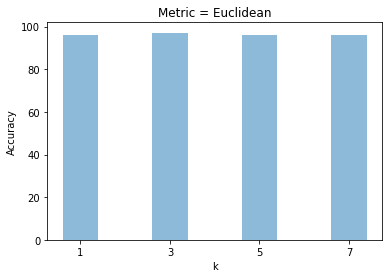

In [62]:
plt.bar(k, euclidean_accuracy, align='center', alpha=0.5)
plt.xticks(k)
plt.xlabel("k")
plt.ylabel('Accuracy')
plt.title('Metric = Euclidean')
plt.show()

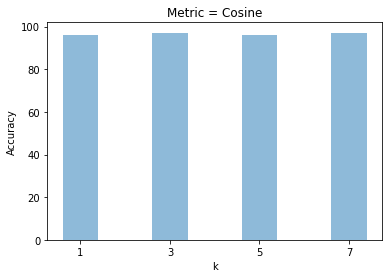

In [63]:
plt.bar(k, cosine_accuracy, align='center', alpha=0.5)
plt.xticks(k)
plt.xlabel("k")
plt.ylabel('Accuracy')
plt.title('Metric = Cosine')
plt.show()

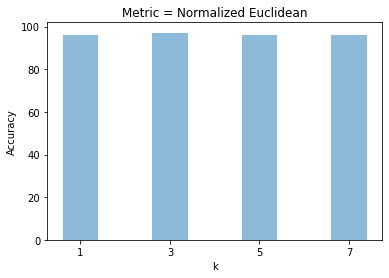

In [64]:
plt.bar(k, normeuclid_accuracy, align='center', alpha=0.5)
plt.xticks(k)
plt.xlabel("k")
plt.ylabel('Accuracy')
plt.title('Metric = Normalized Euclidean')
plt.show()

# D. Using the test dataset

In [65]:
def test_knn(test_data,dev_data,k,metric):
    c = 0
    e = 0
    for i in range(len(test_data)):
        d = []
        h = {1:0,2:0,3:0}
        pred = 0
        if(metric == "euclidean"):
            for j in range(len(dev_data)):
                d = d + [[euclidean(test_data[i][:len(test_data[i])-1],dev_data[j][:len(dev_data[j])-1]),dev_data[j]]]
        elif(metric == "cosine"):
            for j in range(len(dev_data)):
                d = d + [[cosine(test_data[i][:len(test_data[i])-1],dev_data[j][:len(dev_data[j])-1]),dev_data[j]]]
        elif(metric == "normeuclid"):
            for j in range(len(dev_data)):
                d = d + [[normeuclid(test_data[i][:len(test_data[i])-1],dev_data[j][:len(dev_data[j])-1]),dev_data[j]]]
        else:
            return("wrong metric entered")
        d.sort()
        for a in range(k):
            if(d[a][1][-1]==1):
                h[1] = h[1] + 1
            elif(d[a][1][-1]==2):
                h[2] = h[2] + 1   
            elif(d[a][1][-1]==3):
                h[3] = h[3] + 1 
        print(h)
        for g in h:
            if(h[g]>=ceil(k/2)):
                pred = g
                break
        print("actual=" , test_data[i][-1])
        print("predicted=" , pred)
        if(test_data[i][-1] == pred):
            c = c + 1
        else:
            e = e + 1
    print("correctly classified instances: ",c)
    print("incorrectly classified instances: ",e)
    print("Accuracy= ",(c/(c+e))*100)
    return ((c/(c+e))*100)

In [66]:
test_knn(test,dev,3,"cosine")

{1: 0, 2: 0, 3: 3}
actual= 3
predicted= 3
{1: 3, 2: 0, 3: 0}
actual= 1
predicted= 1
{1: 0, 2: 0, 3: 3}
actual= 3
predicted= 3
{1: 0, 2: 3, 3: 0}
actual= 2
predicted= 2
{1: 3, 2: 0, 3: 0}
actual= 1
predicted= 1
{1: 0, 2: 0, 3: 3}
actual= 3
predicted= 3
{1: 3, 2: 0, 3: 0}
actual= 1
predicted= 1
{1: 3, 2: 0, 3: 0}
actual= 1
predicted= 1
{1: 0, 2: 0, 3: 3}
actual= 2
predicted= 3
{1: 3, 2: 0, 3: 0}
actual= 1
predicted= 1
{1: 0, 2: 2, 3: 1}
actual= 3
predicted= 2
{1: 3, 2: 0, 3: 0}
actual= 1
predicted= 1
{1: 0, 2: 3, 3: 0}
actual= 2
predicted= 2
{1: 3, 2: 0, 3: 0}
actual= 1
predicted= 1
{1: 3, 2: 0, 3: 0}
actual= 1
predicted= 1
{1: 0, 2: 3, 3: 0}
actual= 2
predicted= 2
{1: 0, 2: 3, 3: 0}
actual= 2
predicted= 2
{1: 3, 2: 0, 3: 0}
actual= 1
predicted= 1
{1: 0, 2: 0, 3: 3}
actual= 3
predicted= 3
{1: 0, 2: 3, 3: 0}
actual= 2
predicted= 2
{1: 0, 2: 0, 3: 3}
actual= 3
predicted= 3
{1: 0, 2: 3, 3: 0}
actual= 2
predicted= 2
{1: 0, 2: 3, 3: 0}
actual= 2
predicted= 2
{1: 0, 2: 3, 3: 0}
actual= 2
predi

95.55555555555556